In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel(r'C:\Users\sunabh824_2\Desktop\ANZ\ANZ synthesised transaction dataset.xlsx')

In [4]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [6]:
data.shape

(12043, 23)

In [7]:
pd.DataFrame({'columns': data.columns})

,columns
0,status
1,card_present_flag
2,bpay_biller_code
3,account
4,currency
5,long_lat
6,txn_description
7,merchant_id
8,merchant_code
9,first_name


# Basic Checks

### Unique customers, unique transactions and 3 months of data

In [8]:
data.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

In [9]:
data['movement'].unique()

array(['debit', 'credit'], dtype=object)

In [10]:
data.date.describe()

C:\Users\SUNABH~1\AppData\Local\Temp/ipykernel_7760/3984613233.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

In [11]:
pd.date_range(start = '2018-08-01', end = '2018-10-31').difference(data.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

###### we have one missing date on 16/08/20186

### null values

In [12]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

### Missing Values

In [13]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing_percentage = round(missing/len(data), 3)*100
pd.DataFrame({'Number of missing values': missing, 'Percentage': missing_percentage}).sort_values(by = 'Percentage', ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


### EDA

#### Categorical Variables

Here we skip the following columns as they are merely identifiers and won't provide us with much information:
bpay_biller_code, 
account, 
merchant_id, 
merchant_code, 
first_name, 
transaction_id, 
customer_id.

#### Status

In [14]:
data.status.value_counts(dropna = False)

authorized    7717
posted        4326
Name: status, dtype: int64

Authorised means = approved transaction, Posted means = still in process

#### Card present flag

In [15]:
data.card_present_flag.value_counts(dropna = False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

#### Currency of transactions

In [16]:
data.currency.value_counts(dropna = False)

AUD    12043
Name: currency, dtype: int64

#### Longitude and latitude

In [17]:
data.long_lat.head()

0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

#### Transaction description

In [18]:
data.txn_description.value_counts(dropna = False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

C:\Users\sunabh824_2\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by category')

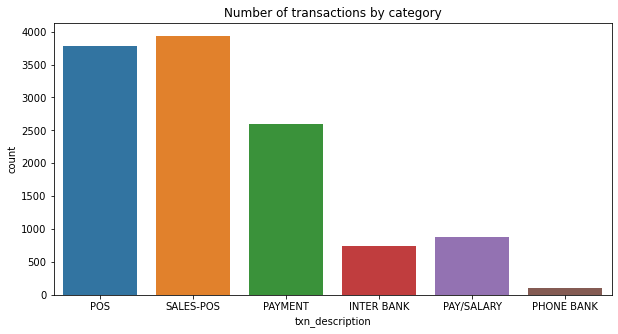

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(data.txn_description)
plt.title('Number of transactions by category')

In [20]:
data[['txn_description', 'amount']].groupby('txn_description', as_index = False).mean().sort_values(by = 'amount', ascending = False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


Text(0.5, 1.0, 'Average transaction volume by category')

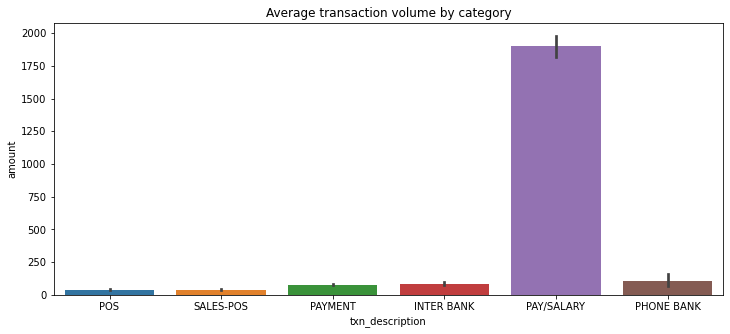

In [21]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'txn_description', y = 'amount', data = data)
plt.title('Average transaction volume by category')

### Gender

In [22]:
data.gender.value_counts(dropna = False)

M    6285
F    5758
Name: gender, dtype: int64

C:\Users\sunabh824_2\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by gender')

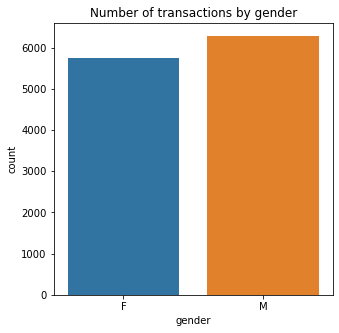

In [23]:
plt.figure(figsize = (5,5))
sns.countplot(data.gender)
plt.title('Number of transactions by gender')

Text(0.5, 1.0, 'Average transaction volume by gender')

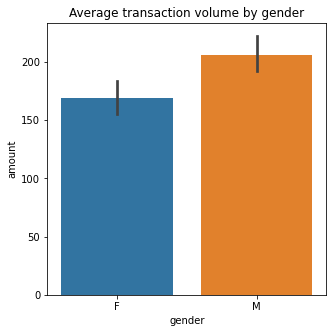

In [24]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'gender', y = 'amount', data = data)
plt.title("Average transaction volume by gender")

### Merchant Suburb

In [25]:
data.merchant_suburb.value_counts(dropna = False)

NaN                  4326
Melbourne             255
Sydney                233
Southport              82
Brisbane City          79
                     ... 
Cowell                  1
Tweed Heads South       1
Ballandean              1
Sydenham                1
Kings Park              1
Name: merchant_suburb, Length: 1610, dtype: int64

### Merchant State

In [26]:
data.merchant_state.value_counts(dropna = False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

C:\Users\sunabh824_2\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by state')

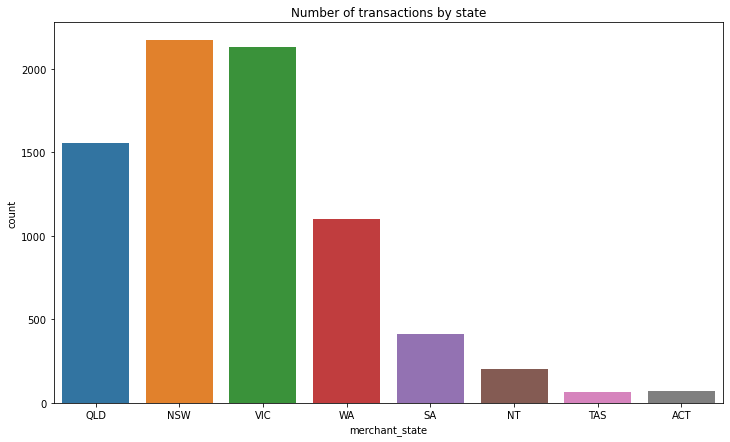

In [27]:
plt.figure(figsize = (12,7))
sns.countplot(data.merchant_state)
plt.title('Number of transactions by state')

In [28]:
data[["merchant_state", "amount"]].groupby("merchant_state", as_index = False).mean().sort_values(by = "amount", ascending = False)

,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


Text(0.5, 1.0, 'Average transaction volume by state')

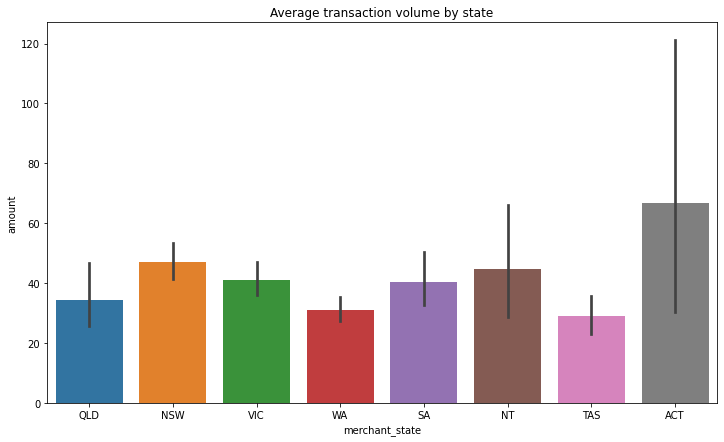

In [29]:
plt.figure(figsize = (12,7))
sns.barplot(x = 'merchant_state', y = 'amount', data = data)
plt.title("Average transaction volume by state")

### Extraction

In [30]:
data.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

###### this appears to be timestamp for each transaction. We can cross reference this with the date column.

In [31]:
data[['date', 'extraction']].head()

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000


### Country

In [32]:
data.country.value_counts(dropna = False)

Australia    12043
Name: country, dtype: int64

### Movement (debit/credit)

In [33]:
data.movement.value_counts(dropna = False)

debit     11160
credit      883
Name: movement, dtype: int64

C:\Users\sunabh824_2\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by movement')

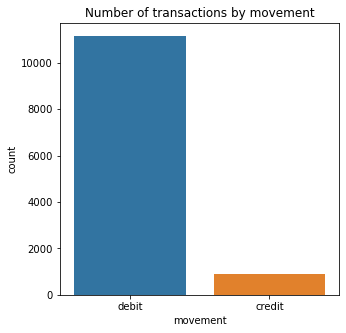

In [34]:
plt.figure(figsize = (5,5))
sns.countplot(data.movement)
plt.title('Number of transactions by movement')

Text(0.5, 1.0, 'Average transaction volume by movement')

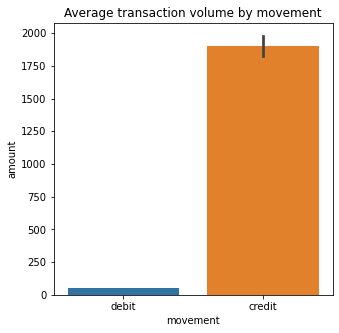

In [35]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'movement', y = 'amount', data = data)
plt.title("Average transaction volume by movement")

### Numerical variables

#### Balance

C:\Users\sunabh824_2\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Balance Distribution')

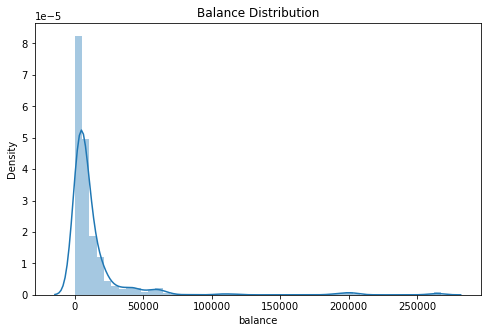

In [36]:
plt.figure(figsize = (8,5))
sns.distplot(data.balance)
plt.title('Balance Distribution')

C:\Users\sunabh824_2\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

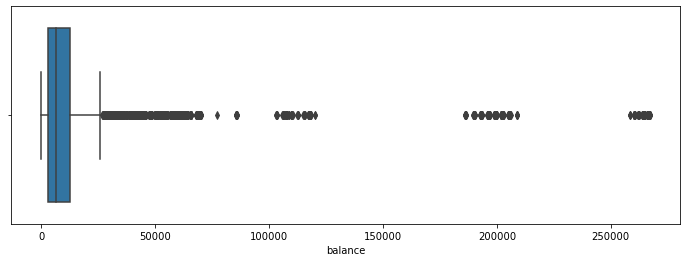

In [37]:
plt.figure(figsize = (12,4))
sns.boxplot(data.balance)

### Age of customers

C:\Users\sunabh824_2\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

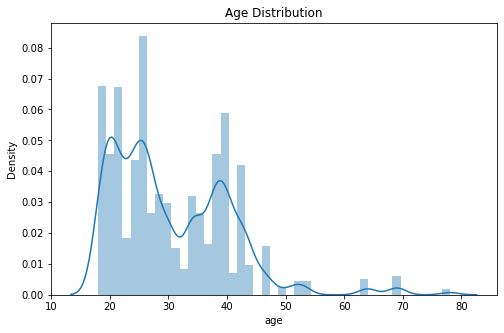

In [38]:
plt.figure(figsize = (8,5))
sns.distplot(data.age)
plt.title('Age Distribution')

C:\Users\sunabh824_2\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amount Distribution')

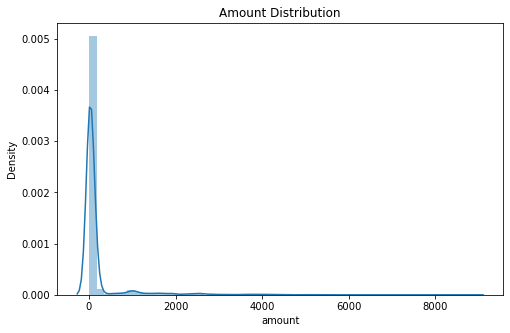

In [39]:
plt.figure(figsize = (8,5))
sns.distplot(data.amount)
plt.title('Amount Distribution')

### Feature Engineering

#### Drop unwanted columns

Drop currency and country

In [40]:
print("Before: ", data.shape)
data = data.drop(["currency","country"], axis = 1)
print("After: ", data.shape)

Before:  (12043, 23)
After:  (12043, 21)


#### Dealing with missing values

In [41]:
pd.DataFrame({'Number of missing values': missing, 'Percentage': missing_percentage}).sort_values(by = 'Percentage', ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


Let's check if there is a reason behind these missing values.

In [42]:
nonsales = data.loc[(data.txn_description != "SALES-POS") | (data.txn_description != "POS"), :]
nonsales.isnull().sum().sort_values(ascending = False)

merchant_code        11160
bpay_biller_code     11158
merchant_suburb       4326
merchant_long_lat     4326
merchant_id           4326
card_present_flag     4326
merchant_state        4326
status                   0
customer_id              0
transaction_id           0
amount                   0
extraction               0
date                     0
age                      0
gender                   0
balance                  0
first_name               0
txn_description          0
long_lat                 0
account                  0
movement                 0
dtype: int64

As expected missing values originate from non purchases transactions:
1. card_present_flag
2. merchant_state
3. merchant_suburb
4. merchant_id
5. merchant_long_lat

we will proceed to fill these missing values with n/a.

In [43]:
cols = ["card_present_flag", "merchant_state", "merchant_suburb", "merchant_id", "merchant_long_lat"]
for col in cols:
    data[col].fillna("n/a", inplace = True)

In [44]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending = False)

merchant_code       11160
bpay_biller_code    11158
dtype: int64

Both merchant_code and bpay_biller_code are severely missing. Therefore drop them.

In [45]:
data = data.drop(["merchant_code", "bpay_biller_code"], axis = 1)

Now make sure there are no more missing data

In [46]:
data.isnull().sum().max()

0

### Create features for month, dayofweek and hour

In [47]:
daily_amount = pd.DataFrame(data.groupby("date").amount.sum())
daily_amount.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Transaction volume')

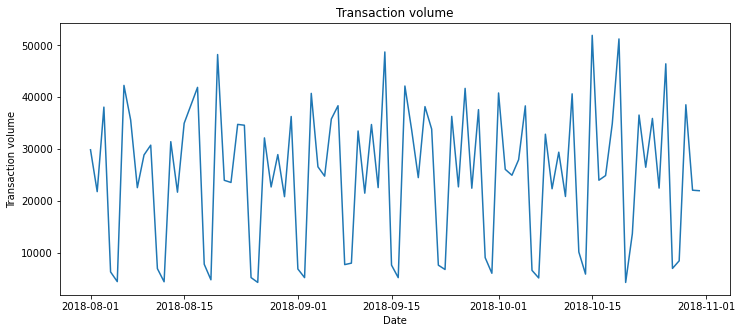

In [48]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(daily_amount.index, daily_amount.amount)
plt.title("Transaction volume")
plt.xlabel("Date")
plt.ylabel("Transaction volume")

There appears to be a cyclical pattern in transaction volume over the 3 month period. My hypothesis for this occurence is: 
1) Salaries are paid out only on certain days of the week
2) People tend to spend more during the weekends

Therefor, to motivate this analysis we will create 3 new features from both the date and extraction columns:
1) month
2) dayofweek
3) hour 

In [49]:
data["month"] = pd.DatetimeIndex(data.date).month
data["dayofweek"] = pd.DatetimeIndex(data.date).dayofweek
data[["date", "month", "dayofweek"]].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


In addition to month anf day of week, we can also get the hour in which those transactions took place from the extraction column

In [50]:
data.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [51]:
data["extraction"] = [timestamp.split("T")[1].split(".")[0] for timestamp in data.extraction]
data.extraction.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [52]:
data["hour"] = [timestamp.split(":")[0] for timestamp in data.extraction]
data[["extraction", "hour"]].head()

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


In [53]:
print("Before: ",data.hour.dtype)
data["hour"] = pd.to_numeric(data.hour)
print("After: ", data.hour.dtype)

Before:  object
After:  int64


### Deep dive

Now our dataframe is in a much better shape and we have new features to work with, let's gather interesting insights.

In [54]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,dayofweek,hour
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,1
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,1
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,1
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,1
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,1


#### Purchases amount and overall amount

In [55]:
purchase_amount = data.loc[(data.txn_description == "POS") | (data.txn_description == "SALES-POS"), "amount"]
purchase_amount.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

C:\Users\sunabh824_2\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Purchase transaction amount')

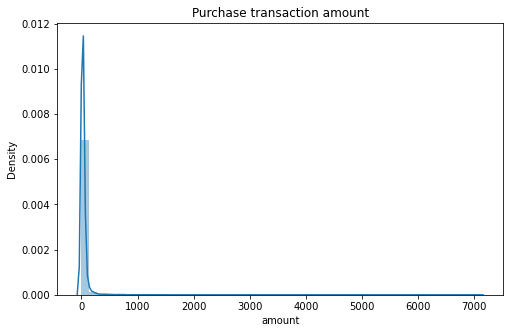

In [56]:
plt.figure(figsize = (8,5))
sns.distplot(purchase_amount)
plt.title("Purchase transaction amount")

In [57]:
purchase_amount.describe()

count    7717.000000
mean       40.153732
std       149.833070
min         0.100000
25%        12.080000
50%        19.700000
75%        33.910000
max      7081.090000
Name: amount, dtype: float64

C:\Users\sunabh824_2\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall transaction amount')

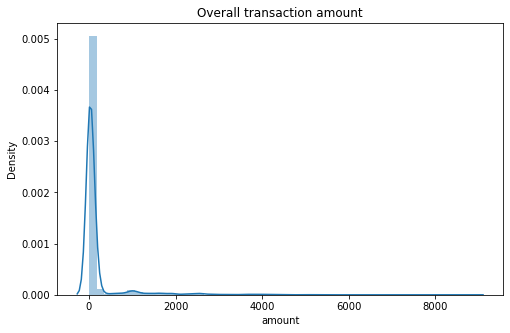

In [58]:
plt.figure(figsize = (8,5))
sns.distplot(data.amount)
plt.title("Overall transaction amount")

In [59]:
data.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

Variance in overall transaction amount is much higher than purchases transaction amount due to the inclusion of salary payments.

### Transaction volume per customer

In [60]:
customer_monthly_volume = pd.DataFrame(data.groupby("customer_id").amount.sum()/3)
customer_monthly_volume.head()

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


C:\Users\sunabh824_2\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Customers' monthly transaction volume")

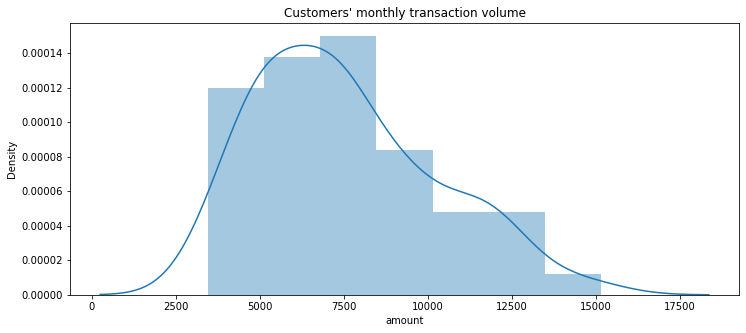

In [61]:
plt.figure(figsize = (12,5))
sns.distplot(customer_monthly_volume.amount)
plt.title("Customers' monthly transaction volume")

### Transaction volume per time

Text(0.5, 1.0, 'Average transaction volume by month')

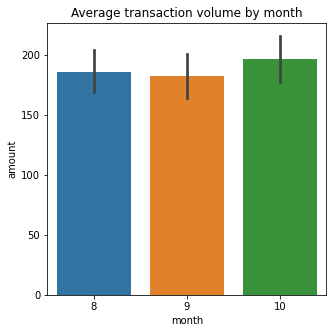

In [62]:
plt.figure(figsize = (5,5))
sns.barplot(x = "month", y = "amount", data = data)
plt.title("Average transaction volume by month")

In [63]:
average_daily_volume = pd.DataFrame(data.groupby("dayofweek").amount.mean())
average_daily_volume.head()

,amount
dayofweek,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517


Text(0, 0.5, 'Transaction volume')

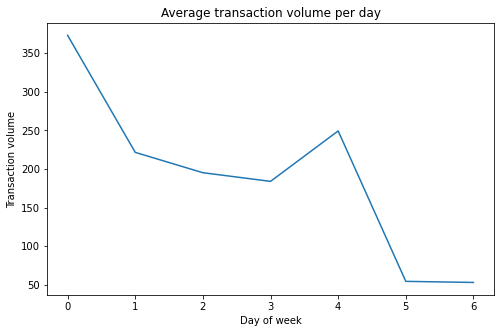

In [64]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(average_daily_volume.index, average_daily_volume.amount)
plt.title("Average transaction volume per day")
plt.xlabel("Day of week")
plt.ylabel("Transaction volume")

Friday & saturday have the lowest average transaction volume. Let's see a breakdown of these transactions by types of transactions:
1) salary 
2) Purchase 
3) Others

In [65]:
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [66]:
data.loc[data.txn_description == "PAY/SALARY", "category"] = "Salary"
data.loc[(data.txn_description == "SALES-POS") | (data.txn_description == "POS"), "category"] = "Purchase"
data.category.fillna("Others", inplace = True)
data[["txn_description", "category"]].head(10)

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
5,PAYMENT,Others
6,SALES-POS,Purchase
7,POS,Purchase
8,POS,Purchase
9,INTER BANK,Others


Text(0, 0.5, 'Number of transactions')

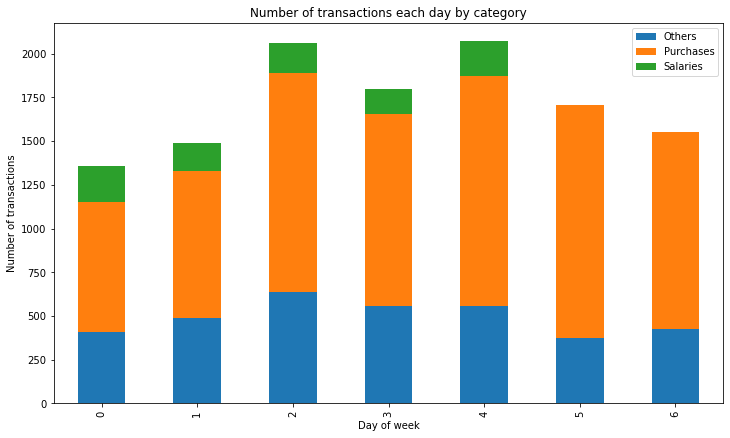

In [67]:
stacked_barplot = pd.DataFrame(data.groupby(["dayofweek", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12,7))
plt.title("Number of transactions each day by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.xlabel("Day of week")
plt.ylabel("Number of transactions")

No salaries were paid on Friday and Saturday, therefor lower average transaction volume on those days.
Also it does not seem to appear that people spend more on purchases over the weekends.

In [68]:
average_hourly_volume = pd.DataFrame(data.groupby("hour").amount.mean())
average_hourly_volume.head()

,amount
hour,
0,28.274907
1,48.716402
2,75.269764
3,84.725918
4,61.301845


Text(0, 0.5, 'Transaction volume')

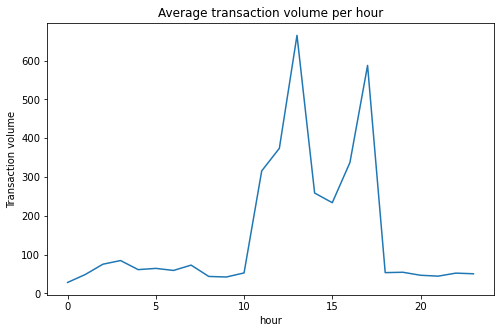

In [69]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(average_hourly_volume.index, average_hourly_volume.amount)
plt.title("Average transaction volume per hour")
plt.xlabel("hour")
plt.ylabel("Transaction volume")

Text(0, 0.5, 'Number of transactions')

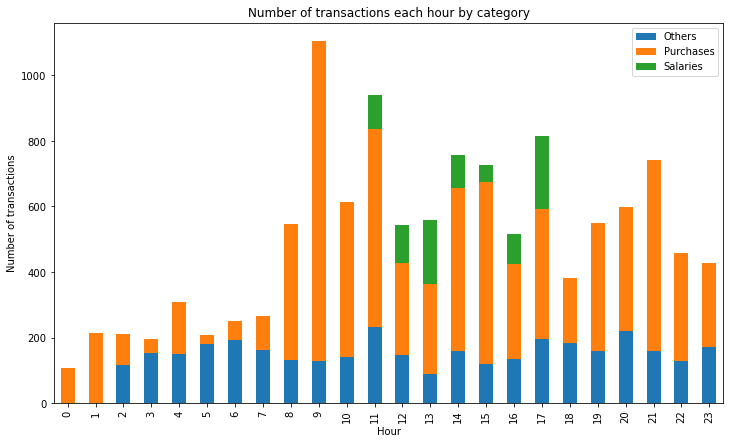

In [70]:
stacked_barplot = pd.DataFrame(data.groupby(["hour", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12,7))
plt.title("Number of transactions each hour by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.xlabel("Hour")
plt.ylabel("Number of transactions")

### Save Data

In [72]:
data.to_pickle(r'C:\Users\sunabh824_2\Desktop\ANZ\ANZ transaction dataset.pk1')